# Sorting accuracy

Does disconnecting the network, and reducing spike collisions, improve sorting accuracy?

## Setup

activate `npx_10m_384ch_unit_classes`

In [27]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os
import numpy as np
from matplotlib import pyplot as plt

# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/sfn_2023"
os.chdir(PROJ_PATH)

# GET CUSTOM LIBRARY
from src.nodes.utils import get_config
from src.nodes.postpro.accuracy import get_sorting_accuracies

# npx-32
EXPERIMENT = "silico_neuropixels"
SIMULATION_DATE = "2023_02_19"
data_conf, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()
KS3_SORTING_PATH = data_conf["sorting"]["sorters"]["kilosort3"]["output"]
GT_SORTING_PATH = data_conf["sorting"]["simulation"]["ground_truth"]["output"]


# npx-32
EXPERIMENT_DISCO = "silico_neuropixels"
SIMULATION_DATE_DISCO = "2023_10_01"
data_conf_disco, _ = get_config(EXPERIMENT_DISCO, SIMULATION_DATE_DISCO).values()
KS3_SORTING_PATH_DISCO = data_conf_disco["sorting"]["sorters"]["kilosort3"]["output"]
GT_SORTING_PATH_DISCO = data_conf_disco["sorting"]["simulation"]["ground_truth"]["output"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-10-11 14:11:23,879 - root - utils.py - get_config - INFO - Reading experiment config.
2023-10-11 14:11:23,906 - root - utils.py - get_config - INFO - Reading experiment config. - done
2023-10-11 14:11:23,907 - root - utils.py - get_config - INFO - Reading experiment config.
2023-10-11 14:11:23,920 - root - utils.py - get_config - INFO - Reading experiment config. - done


## Compute

In [28]:
# get buccino accuracies
accuracies = get_sorting_accuracies(GT_SORTING_PATH, KS3_SORTING_PATH)
acc_array = np.array(accuracies)

# get buccino accuracies
accuracies_disco = get_sorting_accuracies(GT_SORTING_PATH_DISCO, KS3_SORTING_PATH_DISCO)
acc_array_disco = np.array(accuracies_disco)

## Plot

/tmp/ipykernel_130493/2601410315.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axis.plot(acc_array, "r", label=f"npx32 connected (1 col, n={len(accuracies)})", linestyle="-", marker="o", markerfacecolor="w", markeredgecolor=[1,0,0], color=[.9,0,0], markersize=MARKERSIZE, markeredgewidth=0.4, linewidth=1);
/tmp/ipykernel_130493/2601410315.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axis.plot(acc_array_disco, "r", label=f"npx32 disconnected (1 col, n={len(accuracies_disco)})", linestyle="-", marker="o", markerfacecolor="w", markeredgecolor=[.3,.3,.3], color=[.3,.3,.3], markersize=MARKERSIZE, markeredgewidth=0.4, linewidth=1);


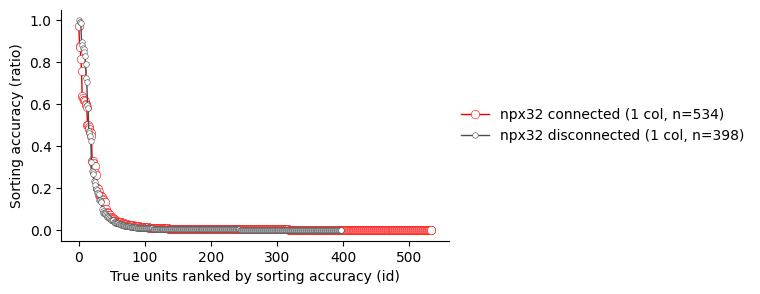

In [29]:
MARKERSIZE = 6

# plot unit accuracies
fig, axis = plt.subplots(1,1,figsize=(5,3))

# plot
axis.plot(acc_array, "r", label=f"npx32 connected (1 col, n={len(accuracies)})", linestyle="-", marker="o", markerfacecolor="w", markeredgecolor=[1,0,0], color=[.9,0,0], markersize=MARKERSIZE, markeredgewidth=0.4, linewidth=1);

MARKERSIZE = 4

# plot unit accuracies (disconnected)
axis.plot(acc_array_disco, "r", label=f"npx32 disconnected (1 col, n={len(accuracies_disco)})", linestyle="-", marker="o", markerfacecolor="w", markeredgecolor=[.3,.3,.3], color=[.3,.3,.3], markersize=MARKERSIZE, markeredgewidth=0.4, linewidth=1);

# legend
axis.set_xlabel("True units ranked by sorting accuracy (id)");
axis.set_ylabel("Sorting accuracy (ratio)");
axis.spines[['right', 'top']].set_visible(False);
axis.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5));

# save figures
plt.savefig("figures/4_controls/pdf/disconnected_unit_accuracies.pdf")
plt.savefig("figures/4_controls/svg/disconnected_unit_accuracies.svg")

## Accuracy

In [30]:
DET_THRESH = 0.8
print("Well detected units (npx382):", accuracies[accuracies >= DET_THRESH].index.tolist())
print("accuracy (npx32-hexO):", len(accuracies[accuracies >= DET_THRESH])/len(accuracies))

Well detected units (npx382): [3891529, 2113524, 1808832, 2121825]
accuracy (npx32-hexO): 0.00749063670411985


In [31]:
DET_THRESH = 0.8
print("Well detected units (npx382 disconnected):", accuracies_disco[accuracies_disco >= DET_THRESH].index.tolist())
print("accuracy (npx32 disconnected):", len(accuracies_disco[accuracies_disco >= DET_THRESH])/len(accuracies_disco))

Well detected units (npx382 disconnected): [891776, 2113524, 2121825, 4070895, 1864097, 1808832, 582918, 4001779, 2076919, 505734]
accuracy (npx32 disconnected): 0.02512562814070352
